## EDA For Haberman DataSet :

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
#Load csv file into a pandas dataFrame.
data = pd.read_csv("haberman_feature_names.csv")
print(data.shape)

(306, 4)


We can see above, the dataset has 306 rows which means entries of 304 patients and it contains 4 columns which inicates features.

In [6]:
print (data.columns)

Index(['age', 'op_year', 'nodes', 'class'], dtype='object')


In [7]:
data["class"].value_counts()

1    225
2     81
Name: class, dtype: int64

In class label, 1 refers to - the patient whosurvived 5 years or longer, so here we can see that out of total 306 patients, 225 patients have survived for more than 5 years after the date of operation. While class 2 refers to the patients who died within 5 year  i.e. 81 patients died within 5 years after the operation.

# 2-D Scatter Plot

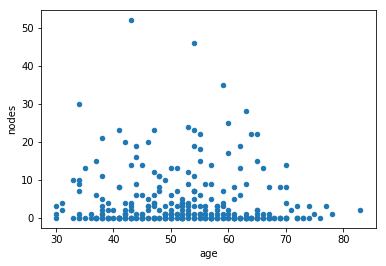

In [8]:
data.plot(kind='scatter', x='age', y='nodes') ;
plt.show()

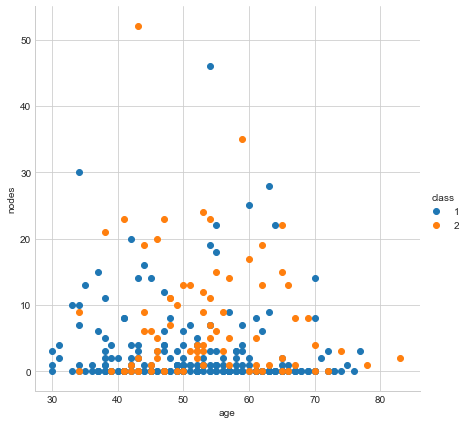

In [9]:
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="class", size=6) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.show();

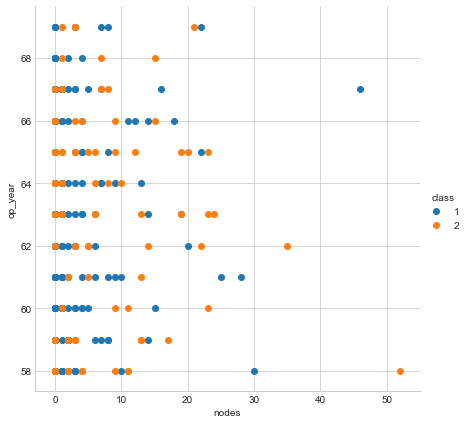

In [10]:
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="class", size=6) \
   .map(plt.scatter, "nodes", "op_year") \
   .add_legend();
plt.show();

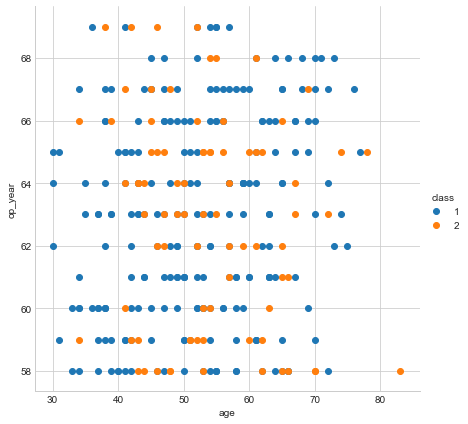

In [11]:
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="class", size=6) \
   .map(plt.scatter, "age", "op_year") \
   .add_legend();
plt.show();

## Observations from Scatter Plot:
0. From the above graphs, we conclude that, the most important feature to separate between survived patients and died patients are age and no. of positive axillary nodes detected.
1. Other combinations other than age and no. of nodes, is not giving any useful result to us.
2. Most of the patients who have age less than 40 have less no. of positive axillary nodes.
3. Most of the patients who have age less than 40 surived for more than 5 years.
4. All patients survived who were between the age of 50 to 60 and no. of axillary nodes were Zero.

#  Pair-plot:

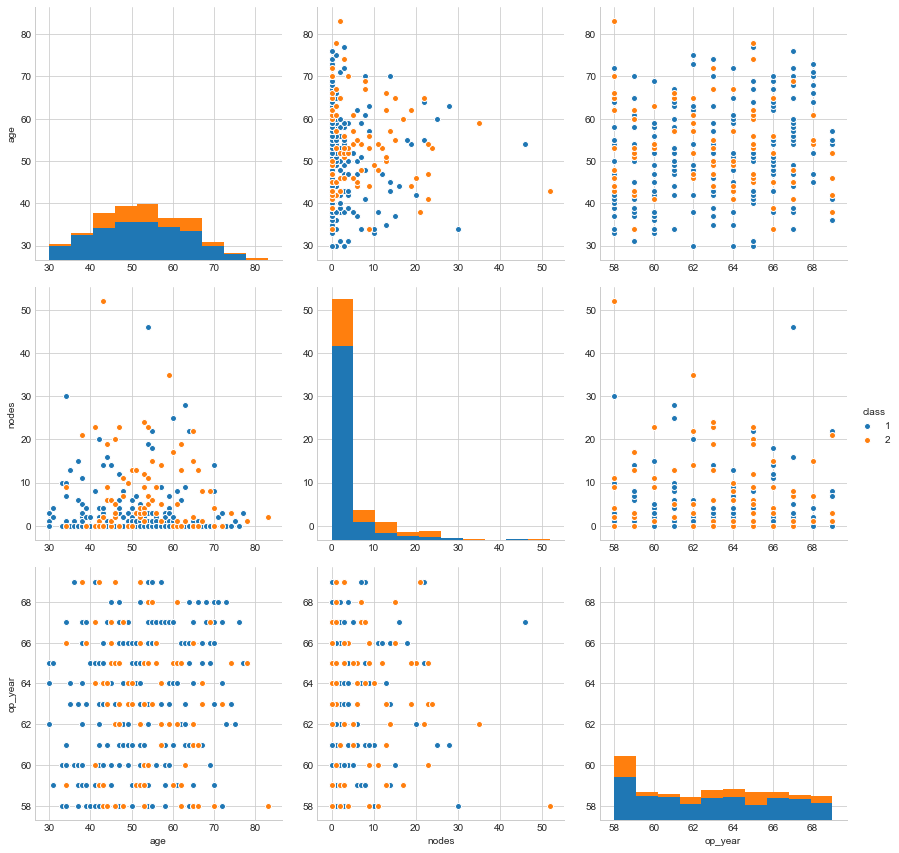

In [12]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data, hue="class", size=4, vars = ['age','nodes','op_year']);
plt.show()

## Observations from Pair-plot:

-> We can conclude that We didn't get much significant information from the pair plot visualization.


# 1-D Plot 

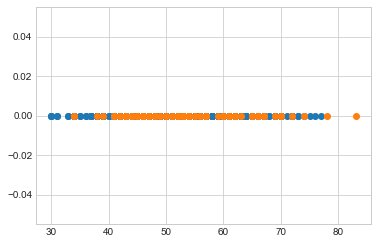

In [13]:
# 1-D Scatter Plot i.e. using just one feature to analyse tha dataset.
#
data_survived = data.loc[data["class"]==1];
data_not_survived = data.loc[data["class"]==2];
# In X-axis, I'm plotting age,nodes and op_year, while in Y-axis i'm putting all the values as Zeroes.
plt.plot(data_survived["age"], np.zeros_like(data_survived['age']),'o')
plt.plot(data_not_survived["age"], np.zeros_like(data_not_survived['age']),'o')
plt.show()

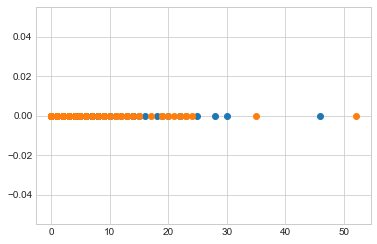

In [14]:
data_survived = data.loc[data["class"]==1];
data_not_survived = data.loc[data["class"]==2];
# In X-axis, I'm plotting age,nodes and op_year, while in Y-axis i'm putting all the values as Zeroes.
plt.plot(data_survived["nodes"], np.zeros_like(data_survived['age']),'o')
plt.plot(data_not_survived["nodes"], np.zeros_like(data_not_survived['age']),'o')
plt.show()

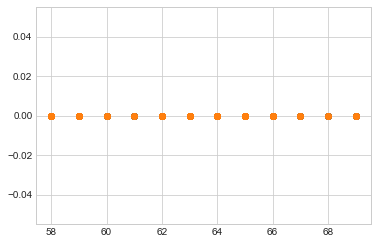

In [15]:
# 1-D Scatter Plot i.e. using just one feature to analyse tha dataset.
data_survived = data.loc[data["class"]==1];
data_not_survived = data.loc[data["class"]==2];
# In X-axis, I'm plotting age,nodes and op_year, while in Y-axis i'm putting all the values as Zeroes.
plt.plot(data_survived["op_year"], np.zeros_like(data_survived['age']),'o')
plt.plot(data_not_survived["op_year"], np.zeros_like(data_not_survived['age']),'o')
plt.show()

# Histogram, PDF and CDF Analysis

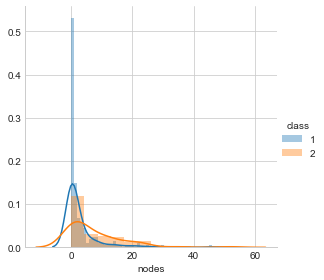

In [16]:
sns.FacetGrid(data, hue="class", size=4) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

### Observations of above Graph:
0. Most of the patients have zero Number of positive axillary nodes detected.

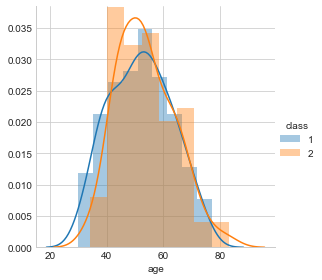

In [17]:
sns.FacetGrid(data, hue="class", size=4) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

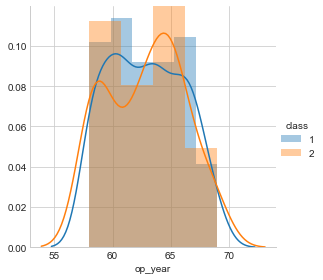

In [18]:
sns.FacetGrid(data, hue="class", size=4) \
   .map(sns.distplot, "op_year") \
   .add_legend();
plt.show();

### Observation:
Univariate analysis of 'age' and 'op_year' features doesn't provides any useful information.

## CDF(Cumulative Distribution Function)

[ 0.83555556  0.08        0.02222222  0.02666667  0.01777778  0.00444444
  0.00888889  0.          0.          0.00444444]
[  0.    4.6   9.2  13.8  18.4  23.   27.6  32.2  36.8  41.4  46. ]


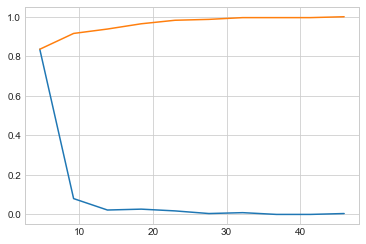

In [31]:
#import numpy as np
counts, bin_edges = np.histogram(data_survived['nodes'], bins =  10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

#Computing CDF:
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

[ 0.56790123  0.14814815  0.13580247  0.04938272  0.07407407  0.
  0.01234568  0.          0.          0.01234568]
[  0.    5.2  10.4  15.6  20.8  26.   31.2  36.4  41.6  46.8  52. ]


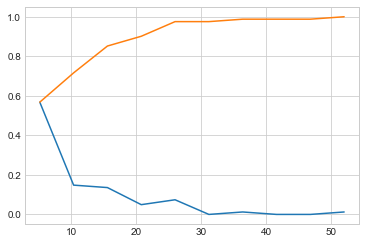

In [36]:
counts, bin_edges = np.histogram(data_not_survived['nodes'], bins =  10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

#Computing CDF:
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

[ 0.03703704  0.12345679  0.19753086  0.19753086  0.13580247  0.12345679
  0.09876543  0.04938272  0.02469136  0.01234568]
[ 34.   38.9  43.8  48.7  53.6  58.5  63.4  68.3  73.2  78.1  83. ]


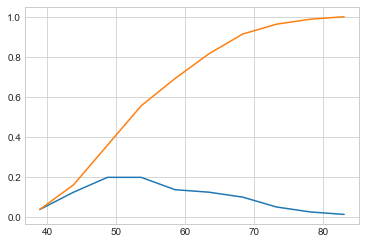

In [34]:
counts, bin_edges = np.histogram(data_not_survived['age'], bins =  10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

#Computing CDF:
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

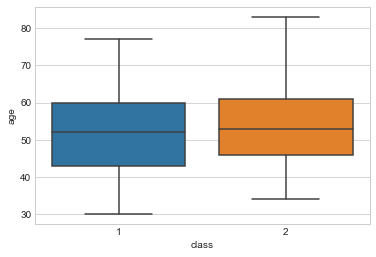

In [37]:

sns.boxplot(x='class',y='age', data=data)
plt.show()

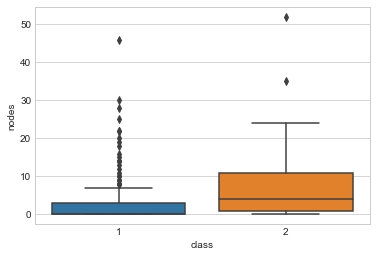

In [38]:
sns.boxplot(x='class',y='nodes', data=data)
plt.show()

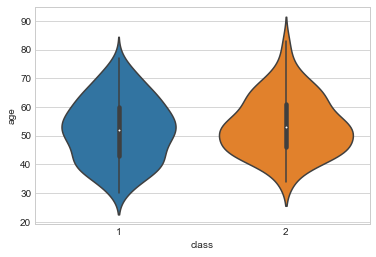

In [39]:
sns.violinplot(x="class", y="age", data=data, size=8)
plt.show()

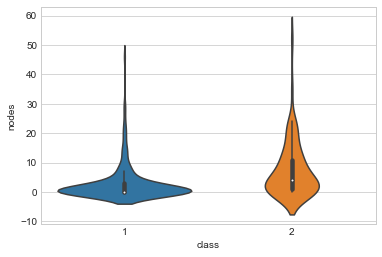

In [40]:
sns.violinplot(x="class", y="nodes", data=data, size=8)
plt.show()